In [1]:
import torch
import torchvision
import matplotlib.pyplot as plt

## Data download

In [2]:
train_data = torchvision.datasets.MNIST(
    root = 'data',
    train = True,                         
    transform = torchvision.transforms.ToTensor(), 
    download = True,            
)
test_data = torchvision.datasets.MNIST(
    root = 'data', 
    train = False, 
    transform = torchvision.transforms.ToTensor()
)

## Data Processing

In [3]:
# Flatten input data
X = torch.flatten(train_data.data,start_dim=1).float()/255
X_test = torch.flatten(test_data.data,start_dim=1).float()/255
y = train_data.targets
y_test = test_data.targets

# 64개씩 데이터를 순서를 섞어서 return하는 dataloader 생성 
ds_train = torch.utils.data.TensorDataset(X, y)
ds_test = torch.utils.data.TensorDataset(X_test, y_test)

loader_train = torch.utils.data.DataLoader(ds_train, 
                                           batch_size=100, 
                                           shuffle=True,    
                                           drop_last=True)  
loader_test = torch.utils.data.DataLoader(ds_test,
                                          batch_size=100,
                                          shuffle=False)

## Model define(2 hidden layer, activation function : ReLU)

In [4]:
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model = torch.nn.Sequential(
    torch.nn.Linear(input_size, hidden_sizes[0], bias=True),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_sizes[0], hidden_sizes[1], bias=True),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_sizes[1], output_size, bias=True) #cross entropy에 softmax 함수 포함
)
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
)


## Training part

In [5]:
learningrate =0.001
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learningrate)

def train(epoch):
    model.train()
  
    for data, targets in loader_train:
        optimizer.zero_grad()
        y_pred = model(data)
        loss = criterion(y_pred, targets)
        loss.backward()
        optimizer.step()
    print('epoch',epoch,'loss',loss)

## Test part

In [6]:
def test():
    model.eval()  # 신경망을 평가 모드로 전환, 불필요한 함수를 제외해줌.

    correct = 0

    # 데이터로더에서 미니배치를 하나씩 꺼내 평가를 수행
    with torch.no_grad():# 평가할 때, 미분이 필요하지 않음
        
        for data, targets in loader_test:

            outputs = model(data)  # 순전파

            # 평가 부분
            _, predicted = torch.max(outputs.data, 1)  # 소프트맥스로 return된 값 중 제일 큰 값
            correct += predicted.eq(targets.data.view_as(predicted)).sum()  # 정답과 일치한 개수를 셈

    # 정확도 출력
    data_num = len(loader_test.dataset)  # 데이터 총 건수
    print('\n테스트 데이터에서 예측 정확도: {}/{} ({:.0f}%)\n'.format(correct,
                                                   data_num, 100. * correct / data_num))

In [7]:
for i in range(15):
    train(i)
test()

epoch 0 loss tensor(0.1441, grad_fn=<NllLossBackward0>)
epoch 1 loss tensor(0.1472, grad_fn=<NllLossBackward0>)
epoch 2 loss tensor(0.1008, grad_fn=<NllLossBackward0>)
epoch 3 loss tensor(0.0919, grad_fn=<NllLossBackward0>)
epoch 4 loss tensor(0.0890, grad_fn=<NllLossBackward0>)
epoch 5 loss tensor(0.0488, grad_fn=<NllLossBackward0>)
epoch 6 loss tensor(0.0542, grad_fn=<NllLossBackward0>)
epoch 7 loss tensor(0.0188, grad_fn=<NllLossBackward0>)
epoch 8 loss tensor(0.0266, grad_fn=<NllLossBackward0>)
epoch 9 loss tensor(0.0105, grad_fn=<NllLossBackward0>)
epoch 10 loss tensor(0.0173, grad_fn=<NllLossBackward0>)
epoch 11 loss tensor(0.0043, grad_fn=<NllLossBackward0>)
epoch 12 loss tensor(0.0232, grad_fn=<NllLossBackward0>)
epoch 13 loss tensor(0.0118, grad_fn=<NllLossBackward0>)
epoch 14 loss tensor(0.0032, grad_fn=<NllLossBackward0>)

테스트 데이터에서 예측 정확도: 9764/10000 (98%)



0~9999사이의 값을 입력하세요1548
예측한 값: tensor(1) 타겟: tensor(1)


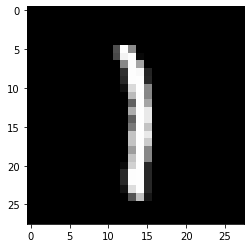

In [8]:
X_test = torch.flatten(test_data.data,start_dim=1).float()/255
output = model(X_test)
predict = output.max(1)[1]
# 데이터 그림과 예측값 그리고 타겟
index = int(input('0~9999사이의 값을 입력하세요'))
test.data = X_test.reshape(10000,28,28)
print('예측한 값:',predict[index],'타겟:',y_test[index])
plt.imshow(test_data.data[index], cmap='gray')